In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv(r"D:\Insurancechurn\insurance.csv",encoding='ISO-8859-1')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
checking missing values


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Feature engineering

In [7]:
df['churn'] = df['charges'].apply(lambda x:1 if x > df['charges'].median() else 0)

Converts categorical variables into numerical format 

In [8]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


Split Features and Target


In [9]:

X = df_encoded.drop(['charges', 'churn'], axis=1)
y = df_encoded['churn']



Splits the data into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Trains a logistic regression model on the training data

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Evaluates the model's performance using classification metrics and a confusion matrix.



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       207
           1       0.89      0.90      0.90       195

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



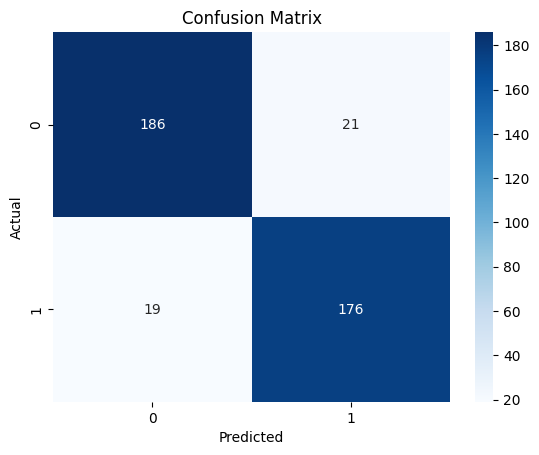

In [12]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
